# **Section 2**

In [1]:
import sys, tweepy
import pandas as pd
import csv
import re
import plotly.graph_objects as gr
import plotly.express as px
import statistics
import numpy as np
import tqdm
import random
import time

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/PSOSMpvt/Twitter.txt', delimiter = "\t", names=['text'])

In [4]:
credLst=[]
for i in df.text:
  credLst.append(str(i))
for i in range(len(credLst)):
  credLst[i]=credLst[i].split()[-1]
# credLst

In [5]:
auth=tweepy.OAuthHandler(credLst[0],credLst[1])
auth.set_access_token(credLst[3],credLst[4])
api=tweepy.API(auth)
if (not api):
    print("Authentication failed")
else:
    print("Authentication successful")

Authentication successful


In [6]:
arrTrends=tweepy.Cursor(api.search,q="CoronaSecondWave",lang="en",tweet_mode='extended').items(2000)

In [7]:
type(arrTrends)

tweepy.cursor.ItemIterator

In [8]:
idData=[]
arrTweets=[]
while True:
  try:
    temp=arrTrends.next()
    arrTweets.append(temp)
  except tweepy.TweepError:
    time.sleep(60*15)
    continue
  except StopIteration:
    break
for i in arrTweets:
  idData.append(i.id_str)

In [9]:
with open('/content/drive/MyDrive/PSOSMpvt/data2HW2.txt','w') as file:
  for items in idData:
    file.write('%s\n' %items)

In [10]:
def insertDict(dictThis, item):
  if item in dictThis:
    dictThis[item]+=1
  else:
    dictThis[item]=1

In [11]:
def sortDict(humUniDict, num):
  return sorted(humUniDict.items(), key=lambda item: item[1], reverse=True)[:num]

In [12]:
hashtagDict={}
for i in arrTweets:
  tempDict={}
  temp=i.full_text
  temp=temp.replace('…','')
  temp=temp.replace('\n',' ')
  tempList=temp.split()
  for j in tempList:
    if j[0]=='#':
      if j in tempDict:
        continue
      else:
        tempDict[j]=True
        insertDict(hashtagDict, j)


In [13]:
commonList=sortDict(hashtagDict,20)
commonList

[('#CoronaSecondWave', 883),
 ('#COVID19', 177),
 ('#coronavirus', 174),
 ('#Corona', 127),
 ('#Cov', 99),
 ('#CoronavirusPandemic', 85),
 ('#COVIDEmergency2021', 71),
 ('#COVID19India', 64),
 ('#Modi', 60),
 ('#TSUNAMI', 56),
 ('#MSunami', 56),
 ('#CoronavirusIndia', 49),
 ('#OxygenCrisis', 42),
 ('#CoronaPandemic', 37),
 ('#CovidIndia', 36),
 ('#Cor', 34),
 ('#Oxygen', 30),
 ('#VakeelSaab', 26),
 ('#Covid', 26),
 ('#India', 22)]

In [14]:
arrTweets[1]

Status(_api=<tweepy.api.API object at 0x7ff1b2ae4f90>, _json={'created_at': 'Sat Apr 24 20:30:18 +0000 2021', 'id': 1386054917941436420, 'id_str': '1386054917941436420', 'full_text': 'For Delhi NCR...\n\n#CoronaSecondWave\n#COVID19\n#CovidIndia https://t.co/qHOQuLz14j', 'truncated': False, 'display_text_range': [0, 56], 'entities': {'hashtags': [{'text': 'CoronaSecondWave', 'indices': [18, 35]}, {'text': 'COVID19', 'indices': [36, 44]}, {'text': 'CovidIndia', 'indices': [45, 56]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1386054907598282755, 'id_str': '1386054907598282755', 'indices': [57, 80], 'media_url': 'http://pbs.twimg.com/media/EzxBmEaVIAMnDbn.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EzxBmEaVIAMnDbn.jpg', 'url': 'https://t.co/qHOQuLz14j', 'display_url': 'pic.twitter.com/qHOQuLz14j', 'expanded_url': 'https://twitter.com/Covid19Warriorr/status/1386054917941436420/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1080, 'h': 1682, 'resize': 'f

In [15]:
india=tweepy.Cursor(api.search,q=commonList[1][0][1:],lang="en",tweet_mode='extended').items(2000)

In [16]:
coronaSec=tweepy.Cursor(api.search,q=commonList[2][0][1:],lang="en",tweet_mode='extended').items(2000)

In [17]:
tollywood=tweepy.Cursor(api.search,q=commonList[3][0][1:],lang="en",tweet_mode='extended').items(2000)

In [18]:
alluArjun=tweepy.Cursor(api.search,q=commonList[4][0][1:],lang="en",tweet_mode='extended').items(2000)

In [19]:
bunny=tweepy.Cursor(api.search,q=commonList[5][0][1:],lang="en",tweet_mode='extended').items(2000)

In [20]:
pus=tweepy.Cursor(api.search,q=commonList[6][0][1:],lang="en",tweet_mode='extended').items(2000)

In [21]:
cOVIDEmergency=tweepy.Cursor(api.search,q=commonList[7][0][1:],lang="en",tweet_mode='extended').items(2000)

In [22]:
covid=tweepy.Cursor(api.search,q=commonList[8][0][1:],lang="en",tweet_mode='extended').items(2000)

In [23]:
cOVID=tweepy.Cursor(api.search,q=commonList[9][0][1:],lang="en",tweet_mode='extended').items(2000)

In [24]:
cOVIDIndia=tweepy.Cursor(api.search,q=commonList[10][0][1:],lang="en",tweet_mode='extended').items(2000)

In [25]:
def fetchArr(arr):
  arrTweets=[]
  while True:
    try:
      temp=arr.next()
      arrTweets.append(temp)
    except tweepy.TweepError:
      time.sleep(60*15)
      continue
    except StopIteration:
      break
  return arrTweets

In [26]:
arrIndia=fetchArr(india)

In [27]:
arrCoronaSec=fetchArr(coronaSec)

In [28]:
arrTollywood=fetchArr(tollywood)

In [29]:
arrAlluArjun=fetchArr(alluArjun)

In [30]:
arrBunny=fetchArr(bunny)

In [31]:
arrPus=fetchArr(pus)

In [32]:
arrCOVIDEmergency=fetchArr(cOVIDEmergency)

In [33]:
arrCovid=fetchArr(covid)

In [34]:
arrCOVID=fetchArr(cOVID)

In [35]:
arrCOVIDIndia=fetchArr(cOVIDIndia)

In [36]:
universalArr=[]
universalArr.extend(arrTweets)
universalArr.extend(arrIndia)
universalArr.extend(arrCoronaSec)
universalArr.extend(arrTollywood)
universalArr.extend(arrAlluArjun)
universalArr.extend(arrBunny)
universalArr.extend(arrPus)
universalArr.extend(arrCOVIDEmergency)
universalArr.extend(arrCovid)
universalArr.extend(arrCOVID)
universalArr.extend(arrCOVIDIndia)

In [37]:
with open('/content/drive/MyDrive/PSOSMpvt/fullList.txt','w') as file:
  for items in universalArr:
    file.write('%s\n' %items)

In [38]:
occurencesDict={}
for i in universalArr:
  tempDict={}
  temp=i.full_text
  temp=temp.replace('…','')
  temp=temp.replace('\n',' ')
  tempList=temp.split()
  for j in tempList:
    if j[0]=='#':
      if j in tempDict:
        continue
      else:
        tempDict[j]=True
        insertDict(occurencesDict, j)

In [39]:
len(universalArr)

18575

In [40]:
occurList=sortDict(occurencesDict,15)
occurList

[('#COVID19', 1336),
 ('#COVIDEmergency2021', 1098),
 ('#COVID19India', 1082),
 ('#CoronaSecondWave', 979),
 ('#CovidIndia', 399),
 ('#coronavirus', 394),
 ('#CoronavirusPandemic', 373),
 ('#Corona', 358),
 ('#TSUNAMI', 347),
 ('#Delhi', 301),
 ('#CovidHelp', 285),
 ('#Tsunami', 245),
 ('#COVIDIOTS', 241),
 ('#Oxygen', 217),
 ('#CovidResources', 197)]

<function matplotlib.pyplot.show>

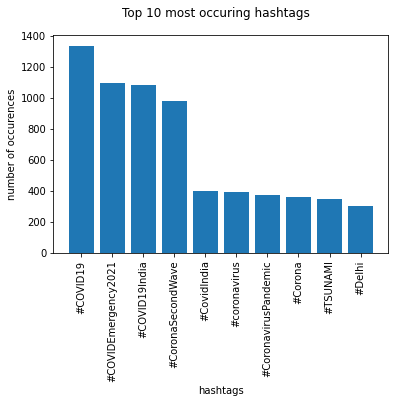

In [41]:
import matplotlib.pyplot as plt
keys=[]
values=[]
for i in range(10):
  keys.append(occurList[i][0])
  values.append(occurList[i][1])

plt.bar(keys,values)
plt.xticks(rotation = 90)
plt.xlabel('hashtags')
plt.ylabel('number of occurences')
plt.suptitle('Top 10 most occuring hashtags')
plt.show

In [42]:
likesDict={}
retweetsDict={}
for i in universalArr:
  tempDict={}
  temp=i.full_text
  temp=temp.replace('…','')
  temp=temp.replace('\n',' ')
  tempList=temp.split()
  for j in tempList:
    if j[0]=='#':
      if j in tempDict:
        continue
      else:
        tempDict[j]=True
        if j in likesDict:
          likesDict[j]+=i.favorite_count
          retweetsDict[j]+=i.retweet_count
        else:
          likesDict[j]=i.favorite_count
          retweetsDict[j]=i.retweet_count

In [43]:
likeList=sortDict(likesDict,15)
likeList

[('#CoronaSecondWave', 4137),
 ('#COVID19', 1078),
 ('#coronavirus', 705),
 ('#TSUNAMI', 667),
 ('#COVID19India', 663),
 ('#COVIDEmergency2021', 627),
 ('#Modi', 625),
 ('#MSunami', 613),
 ('#CoronavirusPandemic', 579),
 ('#Covid', 441),
 ('#CovidIndia', 389),
 ('#Corona', 359),
 ('#IndiaFightsCOVID19', 335),
 ('#covid19,', 246),
 ('#Oxygen', 219)]

In [44]:
retweetList=sortDict(retweetsDict,15)
retweetList

[('#COVID19', 517374),
 ('#COVID19India', 358773),
 ('#Covid', 221261),
 ('#Corona', 156182),
 ('#OxygenShortage', 143796),
 ('#Tsunami', 137164),
 ('#COVID19,', 110400),
 ('#COVIDEmergency2021', 93238),
 ('#COVAXIN', 64610),
 ('#CCPVirus', 42626),
 ('#Unrestr', 35512),
 ('#ModiSarkarHiSystemHai', 33679),
 ('#CoronaSecondWave', 33502),
 ('#PMCares', 32639),
 ('#India’s', 31406)]

<function matplotlib.pyplot.show>

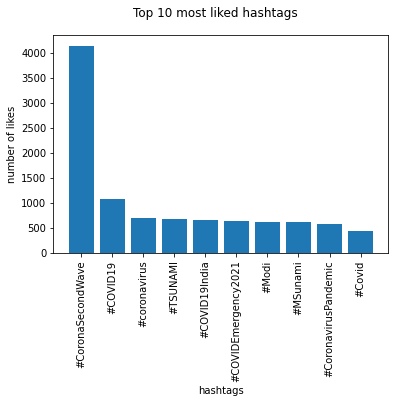

In [45]:
keys=[]
values=[]
for i in range(10):
  keys.append(likeList[i][0])
  values.append(likeList[i][1])

plt.bar(keys,values)
plt.xticks(rotation = 90)
plt.xlabel('hashtags')
plt.ylabel('number of likes')
plt.suptitle('Top 10 most liked hashtags')
plt.show

<function matplotlib.pyplot.show>

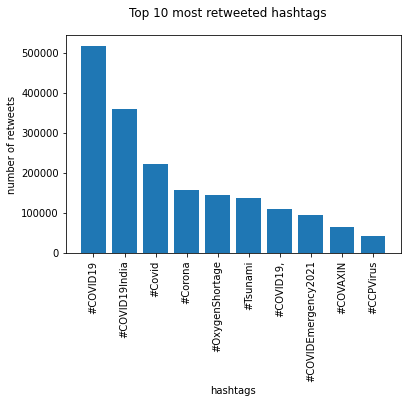

In [46]:
keys=[]
values=[]
for i in range(10):
  keys.append(retweetList[i][0])
  values.append(retweetList[i][1])

plt.bar(keys,values)
plt.xticks(rotation = 90)
plt.xlabel('hashtags')
plt.ylabel('number of retweets')
plt.suptitle('Top 10 most retweeted hashtags')
plt.show

In [47]:
usersDict={}
for i in universalArr:
  insertDict(usersDict,i.user.id_str)
most50User=sortDict(usersDict,50)
topUserDict={}
for i in most50User:
  topUserDict[i[0]]=i[1]
occur10List=[]
for i in occurList[:10]:
  occur10List.append(i[0])
like10List=[]
for i in likeList[:10]:
  like10List.append(i[0])
retweet10List=[]
for i in retweetList[:10]:
  retweet10List.append(i[0])

In [57]:
def trafficFunc(topUserDict,hashList,universalArr):
  ctmTable=pd.DataFrame(columns=['Hashtag','R/10','F','U','C'])
  for i in hashList:
    tweetCount=0
    retweetCount=0
    top50Count=0
    tempUserDict={}
    for j in universalArr:
      if i in j.full_text:
        tweetCount+=1
        if j.full_text[:4] == 'RT @':
          retweetCount+=1
        if (j.user.id_str in topUserDict):
          top50Count+=1
        insertDict(tempUserDict,j.user.id_str)
    r=(retweetCount/tweetCount)*10
    f=(top50Count/tweetCount)*100
    u=(tweetCount/len(tempUserDict))
    c=r+f+u
    ctmTable=ctmTable.append({'Hashtag':i,'R/10':r,'F':f,'U':u,'C':c},ignore_index=True)
  return ctmTable

In [58]:
print(trafficFunc(topUserDict,occur10List,universalArr))

                Hashtag      R/10          F         U          C
0              #COVID19  6.484655   4.503786  1.199904  12.188346
1   #COVIDEmergency2021  5.967886   4.906334  1.268100  12.142319
2         #COVID19India  5.529197   4.014599  1.215078  10.758873
3     #CoronaSecondWave  6.090819   3.356367  1.246002  10.693189
4           #CovidIndia  3.891403   6.334842  1.270115  11.496359
5          #coronavirus  5.525672   8.557457  1.231928  15.315057
6  #CoronavirusPandemic  3.582474  11.855670  1.315254  16.753399
7               #Corona  6.135726   5.384184  1.310066  12.829976
8              #TSUNAMI  8.850575   4.885057  1.689320  15.424953
9                #Delhi  8.000000   8.000000  1.198083  17.198083


In [59]:
print(trafficFunc(topUserDict,like10List,universalArr))

                Hashtag      R/10          F         U          C
0     #CoronaSecondWave  6.090819   3.356367  1.246002  10.693189
1              #COVID19  6.484655   4.503786  1.199904  12.188346
2          #coronavirus  5.525672   8.557457  1.231928  15.315057
3              #TSUNAMI  8.850575   4.885057  1.689320  15.424953
4         #COVID19India  5.529197   4.014599  1.215078  10.758873
5   #COVIDEmergency2021  5.967886   4.906334  1.268100  12.142319
6                 #Modi  7.248460   6.570842  1.453731  15.273033
7              #MSunami  9.858156   4.255319  2.238095  16.351570
8  #CoronavirusPandemic  3.582474  11.855670  1.315254  16.753399
9                #Covid  5.449102   6.159110  1.316441  12.924654


In [60]:
print(trafficFunc(topUserDict,retweet10List,universalArr))

               Hashtag       R/10          F         U          C
0             #COVID19   6.484655   4.503786  1.199904  12.188346
1        #COVID19India   5.529197   4.014599  1.215078  10.758873
2               #Covid   5.449102   6.159110  1.316441  12.924654
3              #Corona   6.135726   5.384184  1.310066  12.829976
4      #OxygenShortage   4.750000   5.000000  1.071429  10.821429
5             #Tsunami   4.412955  51.012146  2.627660  58.052761
6            #COVID19,   9.493671   1.265823  1.000000  11.759494
7  #COVIDEmergency2021   5.967886   4.906334  1.268100  12.142319
8             #COVAXIN  10.000000   0.000000  1.000000  11.000000
9            #CCPVirus   9.861111   4.166667  1.531915  15.559693
